<a href="https://colab.research.google.com/github/karencfisher/dcgan/blob/main/mnist_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A very basic test case, learning to generate MNIST digits

In [ ]:
# upload DCGAN module
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan2.py'

In [ ]:
# Needs matplotlib version 3.3.4
!pip install matplotlib==3.3.4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
import tensorflow as tf

from dcgan2 import DCGAN, Preprocessor

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
# load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, -1)

preprocess = Preprocessor()
preprocess.fit(X_train)
X_train = preprocess.transform(X_train)

Look at a sample of the original images

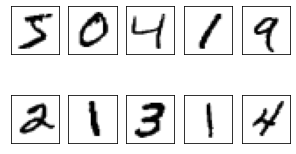

In [3]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = preprocess.inverse(img)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

In [10]:
model_path = None
dcgan = DCGAN(model_path=model_path, channels=1)

d_losses, g_losses = dcgan.train(X_train, 20, 128, verbose=1)

In [ ]:
dcgan.save_model('mnist_models')

Plot the losses during training. The generator and discriminator losses should converge.

In [ ]:
plt.plot(range(1, 21), d_losses, label='disc. loss')
plt.plot(range(1, 21), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()